**Objectives**

The objectives of the project have been reframed, with new reasearch questions coming out from a meeting with other project collaborators. One of the objectives that was derived from this meeting is to analyze what is being consumed with seafood using the FPED derived food components. This new NHANES dataset (NHANES_Full) provides additional columns that break down the food items into categories as laid out by FPED, by using recipes to break down the food item. This research question is being explored here:

When seafood is on the plate, what else is part of the meal?
Drawing on text analysis and FPED categories
 
Here is a link to a dropbox file with the full NHANES dataset including all FPED variables https://www.dropbox.com/s/98vd50tqedqsnzb/nhanes_full.csv?dl=0
 
A quick note about the FPED Table 2 variable names are not exactly what is in the database USDAs provides. The food equivalents in the NHANES file all start with “DR1I_”. For example:
DR1I_PF_x = protein foods 
 DR1I_G_x = grains
DR1I_D_x = dairy
DR1I_V_x = vegetables, etc.
 
A few more variables that will be helpful:
 
eathome splits out “food at home ” (mostly purchased at retail) from “food away from home” (mostly restaurants). (eathome = 1 is “food at home ”;  eathome = 0 is “food away from home ”)
Any analysis we do should be split by home/away food sources since people generally eat healthier when they cook at home.
 
DR1.030Z_2 combines eating occasions listed in English and Spanish together (see attached explanation). This will let us look at breakfast, lunch, dinner, snacks, etc.
 
DR1I_PF_SEAFD_TOT = DR1I_PF_SEAFD_LOW + DR1I_PF_SEAFD_HIGH (or the sum of high omega 3 and low omega 3 fish) If you want to know if a dish has seafood in it, you would use this variable: DR1I_PF_SEAFD_TOT   

In [1]:
import pandas as pd
import re

#Read the structured dataframe
nhanes_full = pd.read_pickle('../../Data/nhanes_full_filtered.pkl')
nhanes_full_cols = nhanes_full.columns.values.tolist()


#Create a list of all the FPED columns, removing the "DR1I_" prefix. 
fped_cols = []
for i in range(len(nhanes_full_cols)):
    if (re.match(r"DR1I_", nhanes_full_cols[i])):
        fped_cols.append(re.findall(r"DR1I_(.*)", nhanes_full_cols[i])[0])
        
fped_cols_tot = []
fped_cols_cmp = []
for i in range(len(fped_cols)):
    if (re.search(r"_TOT", fped_cols[i])):
        fped_cols_tot.append(fped_cols[i])
    else: fped_cols_cmp.append(fped_cols[i])


#Remove the "DR1I_" prefix for simplification
nhanes_full.columns = nhanes_full.columns.str.replace('^DR1I_', '')

The FPED breakdown of food components is organized by hierarchy, where there are main food components which are broken down even further. The main food components are fruits, vegetables, grains, dairy, protein foods, added sugars, oils, solid fats, and alcoholic drinks. 

In [2]:
#Create a list of the high level food components, as defined in the FPED
#Fruit, Vegetables, Grains, Protein Foods, and Dairy components
food_cmp_level1 = [
    'F_TOTAL',
    'V_TOTAL',
    'G_TOTAL',
    'D_TOTAL',
    'PF_SEAFD_TOT',
    'PF_TOTAL']

food_cmp_oils_fats = [
    'OILS',
    'SOLID_FATS',
    'PF_SEAFD_TOT']

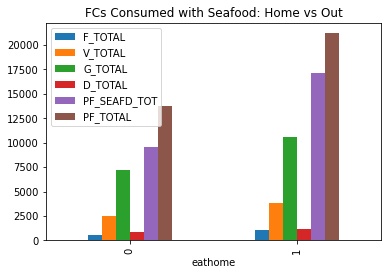

In [3]:
#Explore the aggregate of the main food components within the eat at home vs out groups
nhanes_full_grouped = nhanes_full.groupby('eathome')[food_cmp_level1].sum()
nhanes_full_grouped.plot.bar(title = 'FCs Consumed with Seafood: Home vs Out')

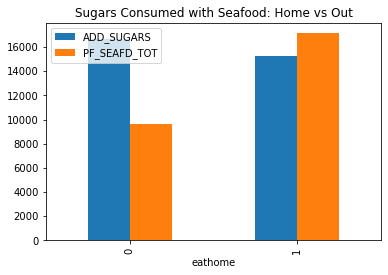

In [6]:
#Explore the aggregate of the added sugars within the eat at home vs out groups
nhanes_sugars_grouped = nhanes_full.groupby('eathome')[['ADD_SUGARS', 'PF_SEAFD_TOT']].sum()
nhanes_sugars_grouped.plot.bar(title = 'Sugars Consumed with Seafood: Home vs Out')

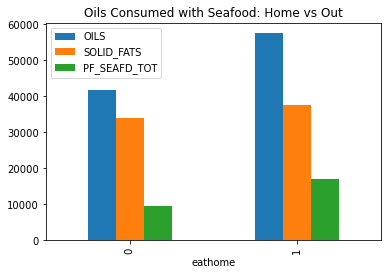

In [4]:
#Explore the aggregate of the oils and fats food components within the eat at home vs out groups
nhanes_oils_grouped = nhanes_full.groupby('eathome')[food_cmp_oils_fats].sum()
nhanes_oils_grouped.plot.bar(title = 'Oils Consumed with Seafood: Home vs Out')

In [7]:
#Define the grouping key by meal. Participant ID, Meal ID, and time of consumption
meal_key = ['SEQN', 'DR1.030Z', 'DR1.020']

#Find the number of meals where participant ate at home vs out
nhanes_meal_num = nhanes_full.groupby(meal_key)['eathome'].sum()
#Number of meals at home
sf_meals_home = nhanes_meal_num[nhanes_meal_num > 0]
sf_meals_home_count = sf_meals_home.count()
#Number of meals outside of home
sf_meals_out = nhanes_meal_num[nhanes_meal_num == 0]
sf_meals_out_count = sf_meals_out.count()

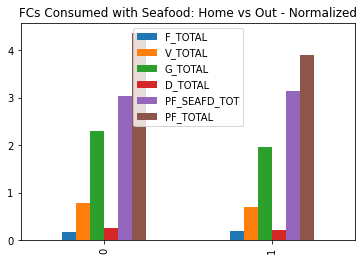

In [8]:
#Normalize the main components to get the unit value per consumed meal and plot
nhanes_full_grouped_norm_0 = nhanes_full_grouped.iloc[0]/sf_meals_out_count
nhanes_full_grouped_norm_1 = nhanes_full_grouped.iloc[1]/sf_meals_home_count
nhnes_full_group_norm = pd.concat([nhanes_full_grouped_norm_0, nhanes_full_grouped_norm_1], axis=1).T
nhnes_full_group_norm.plot.bar(title = 'FCs Consumed with Seafood: Home vs Out - Normalized')

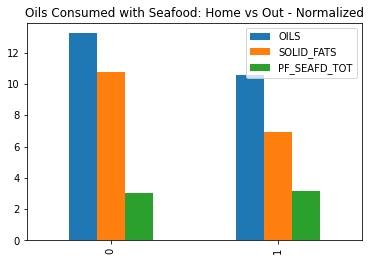

In [9]:
#Normalize the oil and solid fat components to get the unit value per consumed meal and plot
nhanes_oils_grouped_norm_0 = nhanes_oils_grouped.iloc[0]/sf_meals_out_count
nhanes_oils_grouped_norm_1 = nhanes_oils_grouped.iloc[1]/sf_meals_home_count
nhnes_oils_group_norm = pd.concat([nhanes_oils_grouped_norm_0, nhanes_oils_grouped_norm_1], axis=1).T
nhnes_oils_group_norm.plot.bar(title = 'Oils Consumed with Seafood: Home vs Out - Normalized')

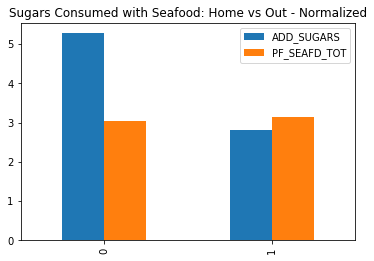

In [10]:
#Normalize the sugars component to get the unit value per consumed meal and plot
nhanes_sugars_grouped_norm_0 = nhanes_sugars_grouped.iloc[0]/sf_meals_out_count
nhanes_sugars_grouped_norm_1 = nhanes_sugars_grouped.iloc[1]/sf_meals_home_count
nhnes_sugars_group_norm = pd.concat([nhanes_sugars_grouped_norm_0, nhanes_sugars_grouped_norm_1], axis=1).T
nhnes_sugars_group_norm.plot.bar(title = 'Sugars Consumed with Seafood: Home vs Out - Normalized')
